In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_circles
import keras
from keras.utils import np_utils
from keras.layers import Dense, Activation
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
X, y = make_circles(n_samples=1000, factor=0.4)
print X.shape, y.shape

(1000, 2) (1000,)


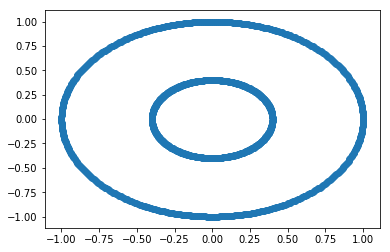

In [3]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

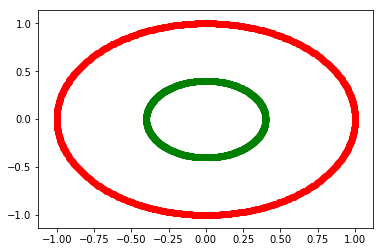

In [4]:
for ix in range(X.shape[0]):
    if y[ix] == 0:
        plt.scatter(X[ix, 0], X[ix, 1], color='red')
    else:
        plt.scatter(X[ix, 0], X[ix, 1], color='green')

plt.show()

In [5]:
Y = np_utils.to_categorical(y)
print Y.shape

for ix in range(10):
    print Y[ix], "---", y[ix]

(1000, 2)
[1. 0.] --- 0
[0. 1.] --- 1
[0. 1.] --- 1
[0. 1.] --- 1
[0. 1.] --- 1
[1. 0.] --- 0
[0. 1.] --- 1
[0. 1.] --- 1
[0. 1.] --- 1
[0. 1.] --- 1


In [6]:
split = int(0.8*X.shape[0])
X_train = X[:split,:]
X_test = X[split:,:]

y_train = Y[:split]
y_test = Y[split:]

print X_train.shape

(800, 2)


In [7]:
## NN in keras
model = Sequential()

model.add(Dense(5,input_shape = (2,)))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 15        
_________________________________________________________________
activation_1 (Activation)    (None, 5)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 12        
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


In [8]:
model2 = Sequential()

model2.add(Dense(2, input_shape=(2,)))
for ix in range(5):
    model2.add(Dense(5))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 15        
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 30        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
hist = model.fit(X_train, y_train, nb_epoch=100,batch_size=100,verbose=2, shuffle=True ,validation_data=(X_test, y_test))

/home/shubhijain/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 800 samples, validate on 200 samples
Epoch 1/100
 - 1s - loss: 0.6546 - acc: 0.5175 - val_loss: 0.6393 - val_acc: 0.5350
Epoch 2/100
 - 0s - loss: 0.6370 - acc: 0.5450 - val_loss: 0.6270 - val_acc: 0.5450
Epoch 3/100
 - 0s - loss: 0.6272 - acc: 0.5550 - val_loss: 0.6180 - val_acc: 0.5450
Epoch 4/100
 - 0s - loss: 0.6197 - acc: 0.5738 - val_loss: 0.6108 - val_acc: 0.5450
Epoch 5/100
 - 0s - loss: 0.6135 - acc: 0.5788 - val_loss: 0.6047 - val_acc: 0.5600
Epoch 6/100
 - 0s - loss: 0.6080 - acc: 0.5812 - val_loss: 0.5994 - val_acc: 0.5600
Epoch 7/100
 - 0s - loss: 0.6030 - acc: 0.5900 - val_loss: 0.5947 - val_acc: 0.5650
Epoch 8/100
 - 0s - loss: 0.5985 - acc: 0.5950 - val_loss: 0.5903 - val_acc: 0.5700
Epoch 9/100
 - 0s - loss: 0.5943 - acc: 0.6013 - val_loss: 0.5863 - val_acc: 0.5850
Epoch 10/100
 - 0s - loss: 0.5903 - acc: 0.6137 - val_loss: 0.5825 - val_acc: 0.6000
Epoch 11/100
 - 0s - loss: 0.5865 - acc: 0.6212 - val_loss: 0.5789 - val_acc: 0.6100
Epoch 12/100
 - 0s - loss: 0

Epoch 97/100
 - 0s - loss: 0.4635 - acc: 0.8525 - val_loss: 0.4474 - val_acc: 0.8800
Epoch 98/100
 - 0s - loss: 0.4626 - acc: 0.8538 - val_loss: 0.4465 - val_acc: 0.8800
Epoch 99/100
 - 0s - loss: 0.4617 - acc: 0.8550 - val_loss: 0.4455 - val_acc: 0.8800
Epoch 100/100
 - 0s - loss: 0.4608 - acc: 0.8550 - val_loss: 0.4445 - val_acc: 0.8800


In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
lr = LogisticRegression()

In [13]:
lr.fit(X_train, y[:split])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
lr.score(X_test, y[split:])

0.355

In [15]:
print type(model)

<class 'keras.engine.sequential.Sequential'>


In [16]:
data = hist.history
print data

{'acc': [0.5174999982118607, 0.544999998062849, 0.5549999959766865, 0.5737500004470348, 0.5787500068545341, 0.5812499895691872, 0.5900000035762787, 0.5949999913573265, 0.6012500002980232, 0.6137499958276749, 0.6212499961256981, 0.6287499964237213, 0.6462500020861626, 0.6575000062584877, 0.6674999967217445, 0.6762500032782555, 0.6850000023841858, 0.6950000077486038, 0.7062500044703484, 0.7150000035762787, 0.7199999988079071, 0.7250000089406967, 0.7300000041723251, 0.7350000068545341, 0.7424999922513962, 0.7512499913573265, 0.7525000050663948, 0.7650000005960464, 0.7824999988079071, 0.7799999862909317, 0.7912499904632568, 0.7987500056624413, 0.8062499910593033, 0.8087499961256981, 0.8137499988079071, 0.8237499892711639, 0.833749994635582, 0.8374999985098839, 0.8449999988079071, 0.8437500074505806, 0.8449999988079071, 0.8449999913573265, 0.8449999913573265, 0.8450000062584877, 0.8462499976158142, 0.8449999988079071, 0.8462500050663948, 0.8462499976158142, 0.8475000038743019, 0.84749999642

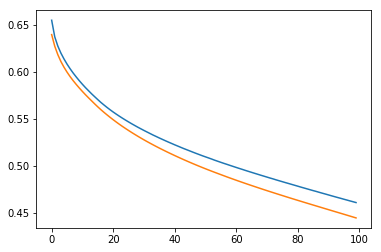

In [17]:
plt.plot(data['loss'])
plt.plot(data['val_loss'])
plt.show()